# Plotting a shapefile in Folium and Geopandas

Easy peasy lemon squeezy

By Colin Talbert, 3/28/2019

In [1]:
import folium # 0.8.3
from folium.plugins import MiniMap

from osgeo import gdal
import geopandas as gpd # 0.4.0+16.g6f1d4bc

In [2]:
#Load up a local shapefile
gdf = gpd.read_file(r"N:\GISData\Active\Carter_BLMCARarePlantModels\Data\Deliverables\Boundaries\PlanningArea_ComboOfDRECPandCDCA_UTM.shp")

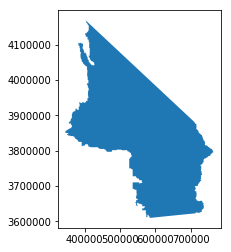

In [3]:
# Make sure the shapefile's geometry looks right
%matplotlib inline
gdf.plot()

## Note: Projections matter
#### If your shapefile is not in WGS84 you'll need to reproject it.
This can be done inline with:  `gdf.to_crs(epsg='4326')`

In [4]:
gdf_wgs84 = gdf.to_crs(epsg='4326')

## Start with a map,
#### Let's center it around our centroid
You could do something clever to auto-determine a reasonable zoom level, or just modify it manually.

*Note: While not canonical I think it's a good practice to use the Portugese word for map 'mapa' in deference to Folium's maintainer Felipe Fernandes.*

In [5]:
centroid = gdf_wgs84.geometry.centroid

mapa = folium.Map([float(centroid.y), float(centroid.x)],
                  zoom_start=8,
                  tiles="OpenStreetMap")


### Add our geometry to the map, add a locator minimap, save it out, and display the final product.

In [6]:
# If you don't want the default styling, you can add something fancy here
gdf_wgs84['style'] = [{'fillColor': '#ff0000', 'weight': 2, 'color': 'black'}]
folium.GeoJson(gdf_wgs84).add_to(mapa)

# Add a locator, because why not?
minimap = folium.plugins.MiniMap(tile_layer='OpenStreetMap', position='topright', width=400, height=400)
minimap.add_to(mapa)

# Save this out for use in another context
mapa.save(r"c:\temp\thumbnail.html")

# Display out fancy map in the notebook
mapa